<a href="https://colab.research.google.com/github/sachi1406/college-assignment/blob/main/IP_Expt_6_Sachi_Shah.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IP-Experiment Number 6 <br>
#Edge Detection using Sobel Mask

- Name: Sachi Shah
- Roll No.: C094
- Batch: EB1
- Sap Id: 70321018081

	
Aim:
1. Apply Sobel’s mask on the given test image to obtain component of gradient $|g_x|$,$|g_y |$and $|g_x+g_y |$.<br>
2. Apply 5x5 averaging filter on the test image and then implement the sequence in step a.<br>
3. Summarize your observations after comparing the results obtained in step a and b.


Import Libraries

In [ ]:
import cv2
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal

Theory:<br>
The Sobel operator performs a 2-D spatial gradient measurement on an image and so emphasizes regions of high spatial frequency that correspond to edges. 


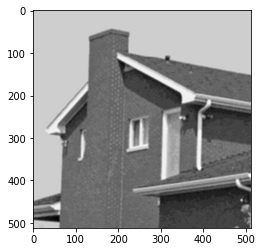

In [ ]:
# load the image house.tiff and read the same
img = cv2.imread('house.tif', 0)
plt.imshow(img, cmap='gray')

Sobel operator for horizontal edges <br>
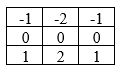

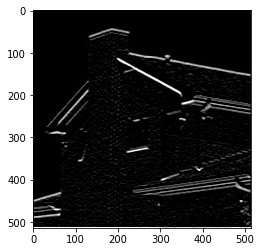

In [ ]:
#Detect horizontal edges using in built convolution function
mask_hor = [[-1,-2,-1],[0,0,0],[1,2,1]]
hor = signal.convolve2d(img,mask_hor)
plt.imshow(hor,cmap = 'gray',vmin = 0,vmax = 255)

Sobel operator for vertical edges <br>
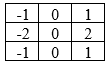

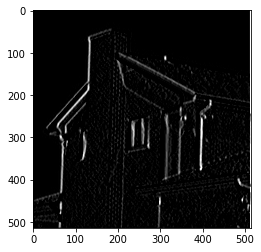

In [ ]:
#Detect vertical edges using inbuilt function for convolution
mask_ver = [[-1,0,1],[-2,0,2],[-1,0,1]]
ver = signal.convolve2d(img,mask_ver)
plt.imshow(ver,cmap = 'gray',vmin = 0,vmax = 255)

Detecting vertical and horizontal edges using |gx|+|gy|

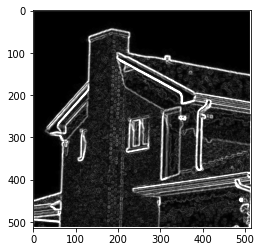

In [ ]:
#Detecting vertical and horizontal edges
final = abs(hor) + abs(ver)
plt.imshow(final,cmap = 'gray',vmin = 0,vmax = 255)

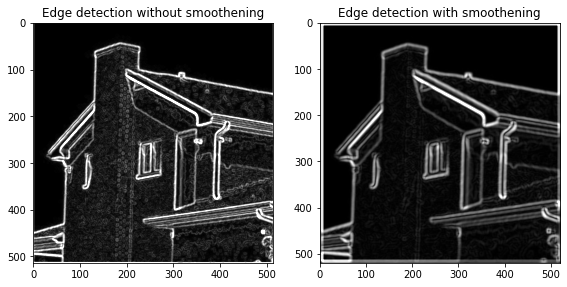

In [ ]:
#remove fine details
#effect of smoothening and then performing edge detection
#smoothening

mask = np.ones((7,7),dtype = int)
mask_s = mask/49
smooth = signal.convolve2d(img,mask_s)

mask_hor = [[-1,-2,-1],[0,0,0],[1,2,1]]
hor_smoothened = signal.convolve2d(smooth,mask_hor)

mask_ver = [[-1,0,1],[-2,0,2],[-1,0,1]]
ver_smoothened = signal.convolve2d(smooth,mask_ver)

output_after_smoothening = abs(hor_smoothened) + abs(ver_smoothened)

plt.figure(figsize=(8,8))

plt.subplot(121)
plt.imshow(final,cmap='gray',vmin = 0,vmax = 255)
plt.title('Edge detection without smoothening')
plt.subplot(122)
plt.imshow(output_after_smoothening,cmap='gray',vmin = 0,vmax = 255)
plt.title('Edge detection with smoothening')

plt.tight_layout()

# Students have to perform all the above steps for jetplane.tif image

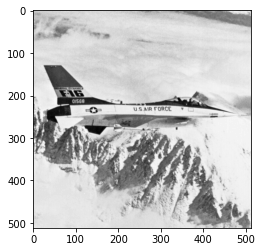

In [ ]:
# load the jetplane.tif image and read the same
img_jet = cv2.imread('jetplane.tif', 0)
plt.imshow(img_jet, cmap='gray')


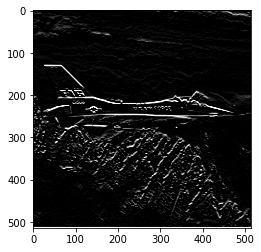

In [ ]:
#Detect horizontal edges using in built convolution function
mask_hor_jet = [[-1,-2,-1],[0,0,0],[1,2,1]]
hor_jet = signal.convolve2d(img_jet,mask_hor_jet)
plt.imshow(hor_jet,cmap = 'gray',vmin = 0,vmax = 255)

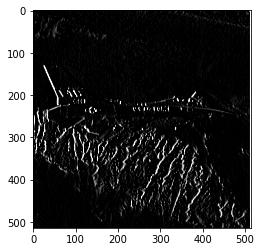

In [ ]:
#Detect vertical edges using inbuilt function for convolution
mask_ver_jet = [[-1,0,1],[-2,0,2],[-1,0,1]]
ver_jet = signal.convolve2d(img_jet,mask_ver_jet)
plt.imshow(ver_jet,cmap = 'gray',vmin = 0,vmax = 255)


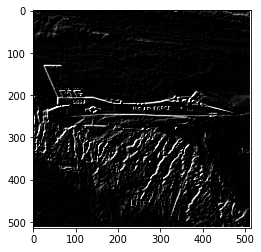

In [ ]:
# Detecting Diagonal with inbuilt convolve (forward Diagonal)

mask_diag_forward = [[-2,-1,0],[-1,0,1],[0,1,2]]
diag_forward = signal.convolve2d(img_jet,mask_diag_forward)
plt.imshow(diag_forward,cmap = 'gray',vmin = 0,vmax = 255)


Backward diagonal edges <br>
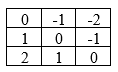


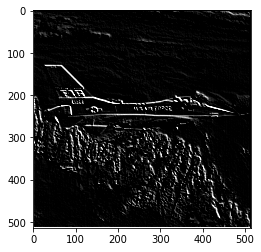

In [ ]:
# Detecting Diagonal with inbuilt convolve (Backward Diagonal)

mask_diag_backward = [[0,-1,-2],[1,0,-1],[2,1,0]]
diag_backward = signal.convolve2d(img_jet,mask_diag_backward)
plt.imshow(diag_backward,cmap = 'gray',vmin = 0,vmax = 255)


# Edge in all four directions <br>

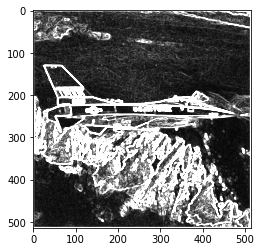

In [ ]:
#Horizontal, vertical and diagonal edges

final_jet = abs(hor_jet) + abs(ver_jet) + abs(diag_forward) + abs(diag_backward)
plt.imshow(final_jet,cmap = 'gray',vmin = 0,vmax = 255)


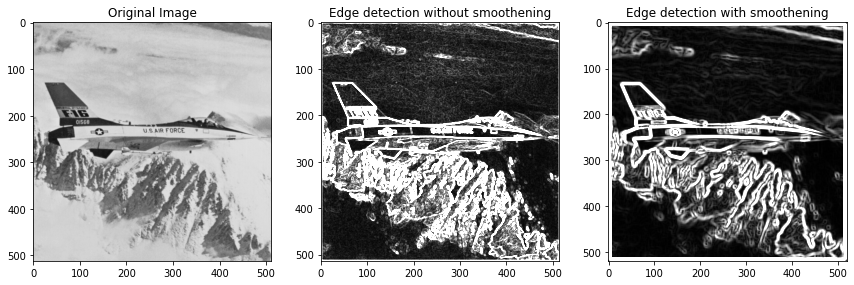

In [ ]:
#remove fine details
#effect of smoothening and then performing edge detection
#smoothening

mask = np.ones((7,7),dtype = int)
mask_s = mask/49
smooth_jet = signal.convolve2d(img_jet,mask_s)

jet_mask_hor = [[-1,-2,-1],[0,0,0],[1,2,1]]
jet_hor_smoothened = signal.convolve2d(smooth_jet,jet_mask_hor)

jet_mask_ver = [[-1,0,1],[-2,0,2],[-1,0,1]]
jet_ver_smoothened = signal.convolve2d(smooth_jet,jet_mask_ver)

jet_mask_diag_backward = [[0,-1,-2],[1,0,-1],[2,1,0]]
jet_diag_backward_smoothened = signal.convolve2d(smooth_jet,jet_mask_diag_backward)

jet_mask_diag_forward = [[-2,-1,0],[-1,0,1],[0,1,2]]
jet_diag_forward_smoothened = signal.convolve2d(smooth_jet,jet_mask_diag_forward)

output_after_smoothening_jet = abs(jet_hor_smoothened) + abs(jet_ver_smoothened) + abs(jet_diag_backward_smoothened) + abs(jet_diag_forward_smoothened)

plt.figure(figsize=(12,12))

plt.subplot(131)
plt.imshow(img_jet,cmap='gray',vmin = 0,vmax = 255)
plt.title('Original Image')
plt.subplot(132)
plt.imshow(final_jet,cmap='gray',vmin = 0,vmax = 255)
plt.title('Edge detection without smoothening')
plt.subplot(133)
plt.imshow(output_after_smoothening_jet,cmap='gray',vmin = 0,vmax = 255)
plt.title('Edge detection with smoothening')

plt.tight_layout()

# The following question has to be solved by students. Scan and copy-paste the answer here.

Q. consider the given image matrix <br>
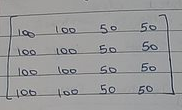


Replicate the edges and apply sobel mask to detect the gradient in :<br>
(i) horizontal firection
(ii) vertical direction
(iii) horizonatla and vertical direction

#Answer

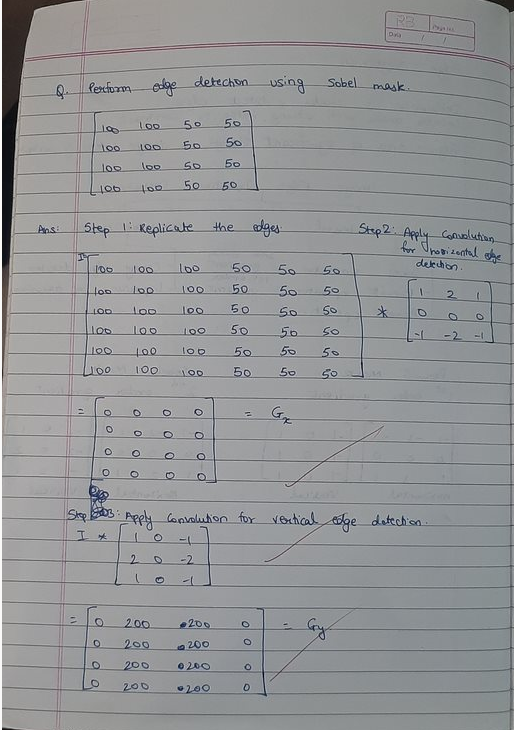

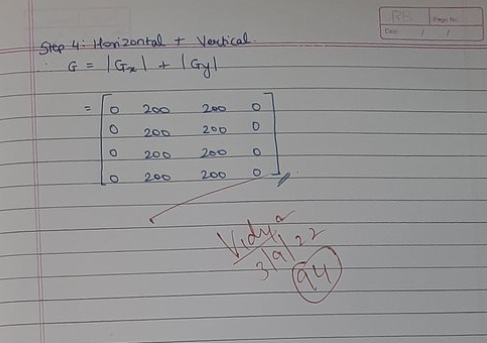

#Conclusion : 
1. We implemented the code for edge detection using Sobel Mask. Sobel mask is based on second order derivative. 
2. We detected the horizontal, vertical and diagonal edges of the given image however the sobel mask also detects the minute details that are sometimes unrequired. 
3. These can be removed by first smoothening the image using the average filter and then doing edge detection. 